In [29]:
#import the necessary libraries/packages

import pandas as pd
import numpy as np

In [ ]:
The following is the abstract provided in the problem.

Abstract: 3D road network with highly accurate elevation information (+-20cm) from Denmark used in eco-routing and 
fuel/Co2-estimation routing algorithms.

My goal: obviously there are different ways to solve the pproblem. Because height is stressed much as accurately provided
and further find its use in other routing algorithms, I have decided to build a regression model in this notebook.


In [2]:
#pandas has an option to read data from a text file, so let's use that

df = pd.read_csv('/Users/chidam/Desktop/3D_spatial_network.txt', sep=",", header=None)

In [3]:
df.head()

,0,1,2,3
0,144552912,9.349849,56.740876,17.052772
1,144552912,9.350188,56.740679,17.614840
2,144552912,9.350549,56.740544,18.083536
3,144552912,9.350806,56.740484,18.279465
4,144552912,9.351053,56.740486,18.422974


In [4]:
#let's check the length of the dataframe
len(df)

434874

In [5]:
#let's give the columns some names to identify them



df.rename(columns={0: "mapid", 1:"longitude", 2:"latitude", 3:"height"}, inplace=True)

In [6]:
#check the dataframe after naming the columns

df.head()

,mapid,longitude,latitude,height
0,144552912,9.349849,56.740876,17.052772
1,144552912,9.350188,56.740679,17.614840
2,144552912,9.350549,56.740544,18.083536
3,144552912,9.350806,56.740484,18.279465
4,144552912,9.351053,56.740486,18.422974


In [10]:
#next we have to check whether there are any missing values in the dataset

percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,'percent_missing': percent_missing})
missing_value_df

#result
#looks like there aren't any null values in the dataset

,column_name,percent_missing
mapid,mapid,0.0
longitude,longitude,0.0
latitude,latitude,0.0
height,height,0.0


In [11]:
#this version is good enough to figure out the missing values in the dataset
df.isnull().sum() * 100 / len(df)

mapid        0.0
longitude    0.0
latitude     0.0
height       0.0
dtype: float64

In [12]:
#looks like there are repeated values present in the dataset

df["mapid"].value_counts()


#result
#there are many repeated values. we are talking about a 3D road network and therefore many points in a road are 
#demonstrated



131358199    557
137256876    491
126628907    407
8169309      314
137256823    252
            ... 
110525424      1
127833069      1
111141691      1
151709910      1
129772617      1
Name: mapid, Length: 57329, dtype: int64

In [15]:
#how many number of unique mapids are there in the dataset?


len(df["mapid"].unique())



57329

In [17]:
#which direction to go?
#let's first go with a simple way to model the data.
#I am going to find the average of all values for each mapid based on the reasoning that the different values of 
#height for each mapid are within a similar range without much difference between them

#So I am going to groupby the values of columns according to each mapid and find the average of each column 

df_groupby=df.groupby("mapid").mean().reset_index()


In [18]:
df_groupby.head()

,mapid,longitude,latitude,height
0,4482444,9.938582,57.020572,37.739819
1,4550137,9.917548,57.052560,3.719121
2,4565214,9.925943,57.042537,3.202092
3,4579004,9.930579,57.043663,2.688183
4,4579009,9.934995,57.061023,14.128772


In [19]:
len(df_groupby)

57329

In [23]:

#let's define our target label. 
#.values will give us a list of values of y. because we send a numpy array of values as input into a model .values works great
#.values gives us a numpy array of values 

y=df_groupby["height"].values


In [25]:
#remove the labels from the dataset before assigning it to X
df_groupby.drop("height", axis=1, inplace=True)

In [26]:
X=df_groupby.values

In [30]:
#let's split the dataset into train and test 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [31]:
#let's invoke sklearn linear regression. can also use scipy's linear regression

from sklearn import linear_model
reg = linear_model.LinearRegression()


In [32]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
#let's predict using X_test
y_predict=reg.predict(X_test)

In [34]:
y_predict

array([20.37054931, 19.37514919, 18.54797685, ..., 26.54816898,
       20.43177956, 21.22688217])

In [35]:
#the ground truth values
y_test

#result:
#a quick look can tell you that the values are way off. that's because it is a very simple model without any feature transformations
#also we can observe from the result that there's more to the features that mere average of them wasn't able to capture
#the relationship between them


array([36.49805222, 22.49857577, 60.60848575, ..., 30.10544492,
       16.89447561,  6.87382348])

In [36]:
min(y_test), max(y_test)

(-2.40506741290838, 130.82452329143928)

In [37]:
min(y_predict), max(y_predict)

(10.876915313750942, 30.294483643340982)

In [41]:
len(y_predict)

11466

In [42]:
len(y_test)

11466

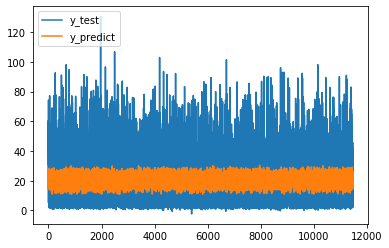

In [45]:
#Let's plot the predicted y values Vs. the ground truth using matplotlib

import matplotlib.pyplot as plt
import numpy as np

x=np.arange(11466)

# plt.gca().set_color_cycle(['red', 'green'])

plt.plot(x, y_test)
plt.plot(x, y_predict)

plt.legend(['y_test', 'y_predict'], loc='upper left')

plt.show()

In [ ]:
Result

From the above plot it is clear that the y_predict is way off from the y_test

It will be interesting to see how much we could improve with re to features, feature transformation, and
model parameters to get the predictions closer to the ground truth in the upcoming notebooks :)
